# Where's Waldo Data Augmentation

The data was collected from [this](https://www.kaggle.com/residentmario/wheres-waldo) Kaggle competition. However, the data for this competition comes in the form of images where waldo is there or not there.

So, I manually created bounding boxes and stored them in the `boxes-128.json` file.

Once I had the bounding boxes, I simply programmatically mapped them onto the original Where's Waldo maps to feed into the network.

In [1]:
import IPython.core.display as di

def toggle_code():
    di.display_html(
        """<button onclick="jQuery('.input_area').toggle();jQuery('.prompt').toggle();">
            Toggle code
        </button>""",
        raw=True,
    )

toggle_code()

Toggle code

In [2]:
import logging
import json
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image

log = logging.getLogger(__name__)

## Example Bounding Boxes

Here are three examples of bounding boxes that I manually curated from the data.

In [3]:
boxes_128 = {}
with open("boxes-128.json") as file:
    boxes_128 =json.loads(file.read())

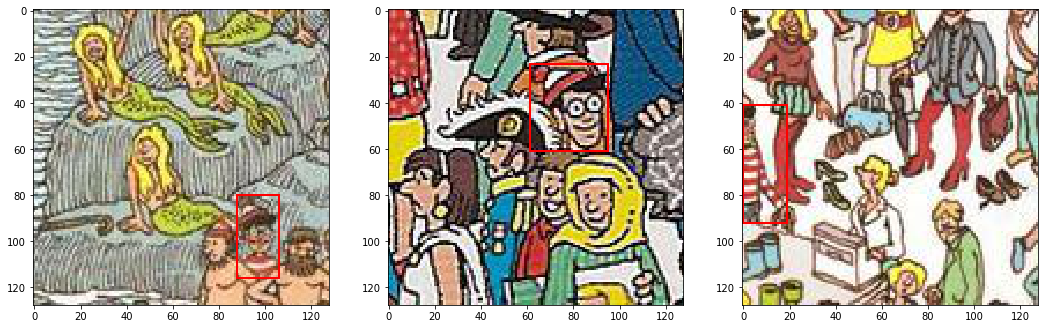

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, waldo in enumerate(os.listdir(os.path.join("data", "128", "waldo"))[:3]):
    axes[i].imshow(Image.open(os.path.join("data", "128", "waldo", waldo)))
    x, y, w, h = boxes_128[waldo]
    axes[i].add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))

plt.show()